In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('dataset_phishing.csv')
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [3]:
df.isnull().sum()

url                0
length_url         0
length_hostname    0
ip                 0
nb_dots            0
                  ..
web_traffic        0
dns_record         0
google_index       0
page_rank          0
status             0
Length: 89, dtype: int64

In [4]:
df.dtypes

url                object
length_url          int64
length_hostname     int64
ip                  int64
nb_dots             int64
                    ...  
web_traffic         int64
dns_record          int64
google_index        int64
page_rank           int64
status             object
Length: 89, dtype: object

In [5]:
print(df.shape)
print(df['status'].value_counts())

(11430, 89)
status
legitimate    5715
phishing      5715
Name: count, dtype: int64


#### COUNTPLOT

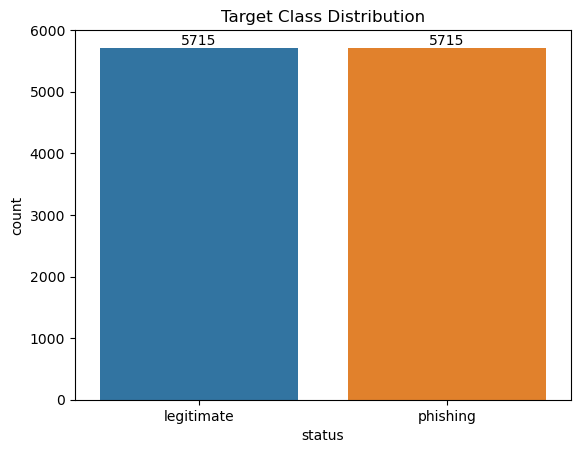

In [7]:
ax=sns.countplot(data=df,x='status')
plt.title("Target Class Distribution")
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10)
plt.show()

#### HEATMAP

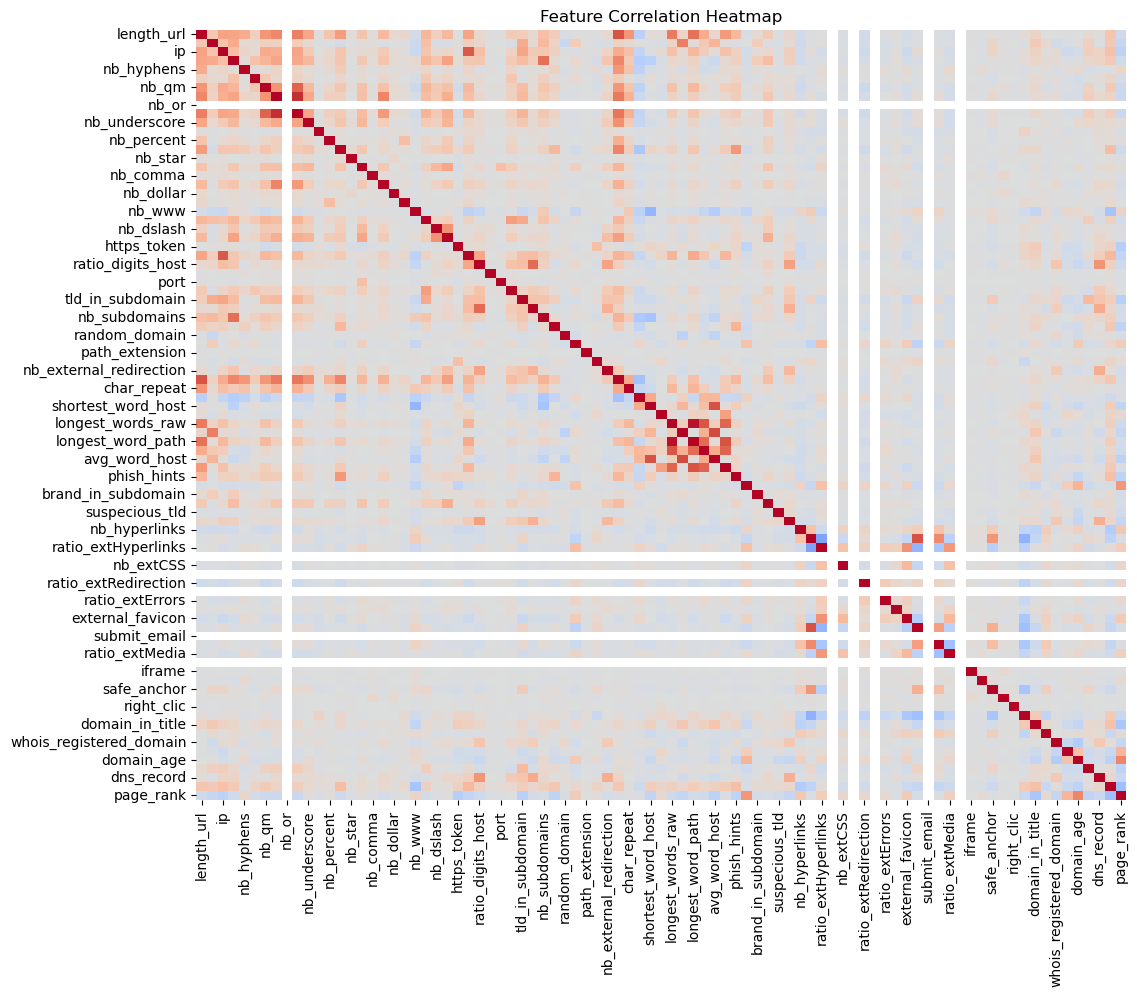

In [9]:
plt.figure(figsize=(12,10))
sns.heatmap(df.drop(columns=['url']).corr(numeric_only=True),cmap='coolwarm',center=0,cbar=False)
plt.title("Feature Correlation Heatmap")
plt.show()

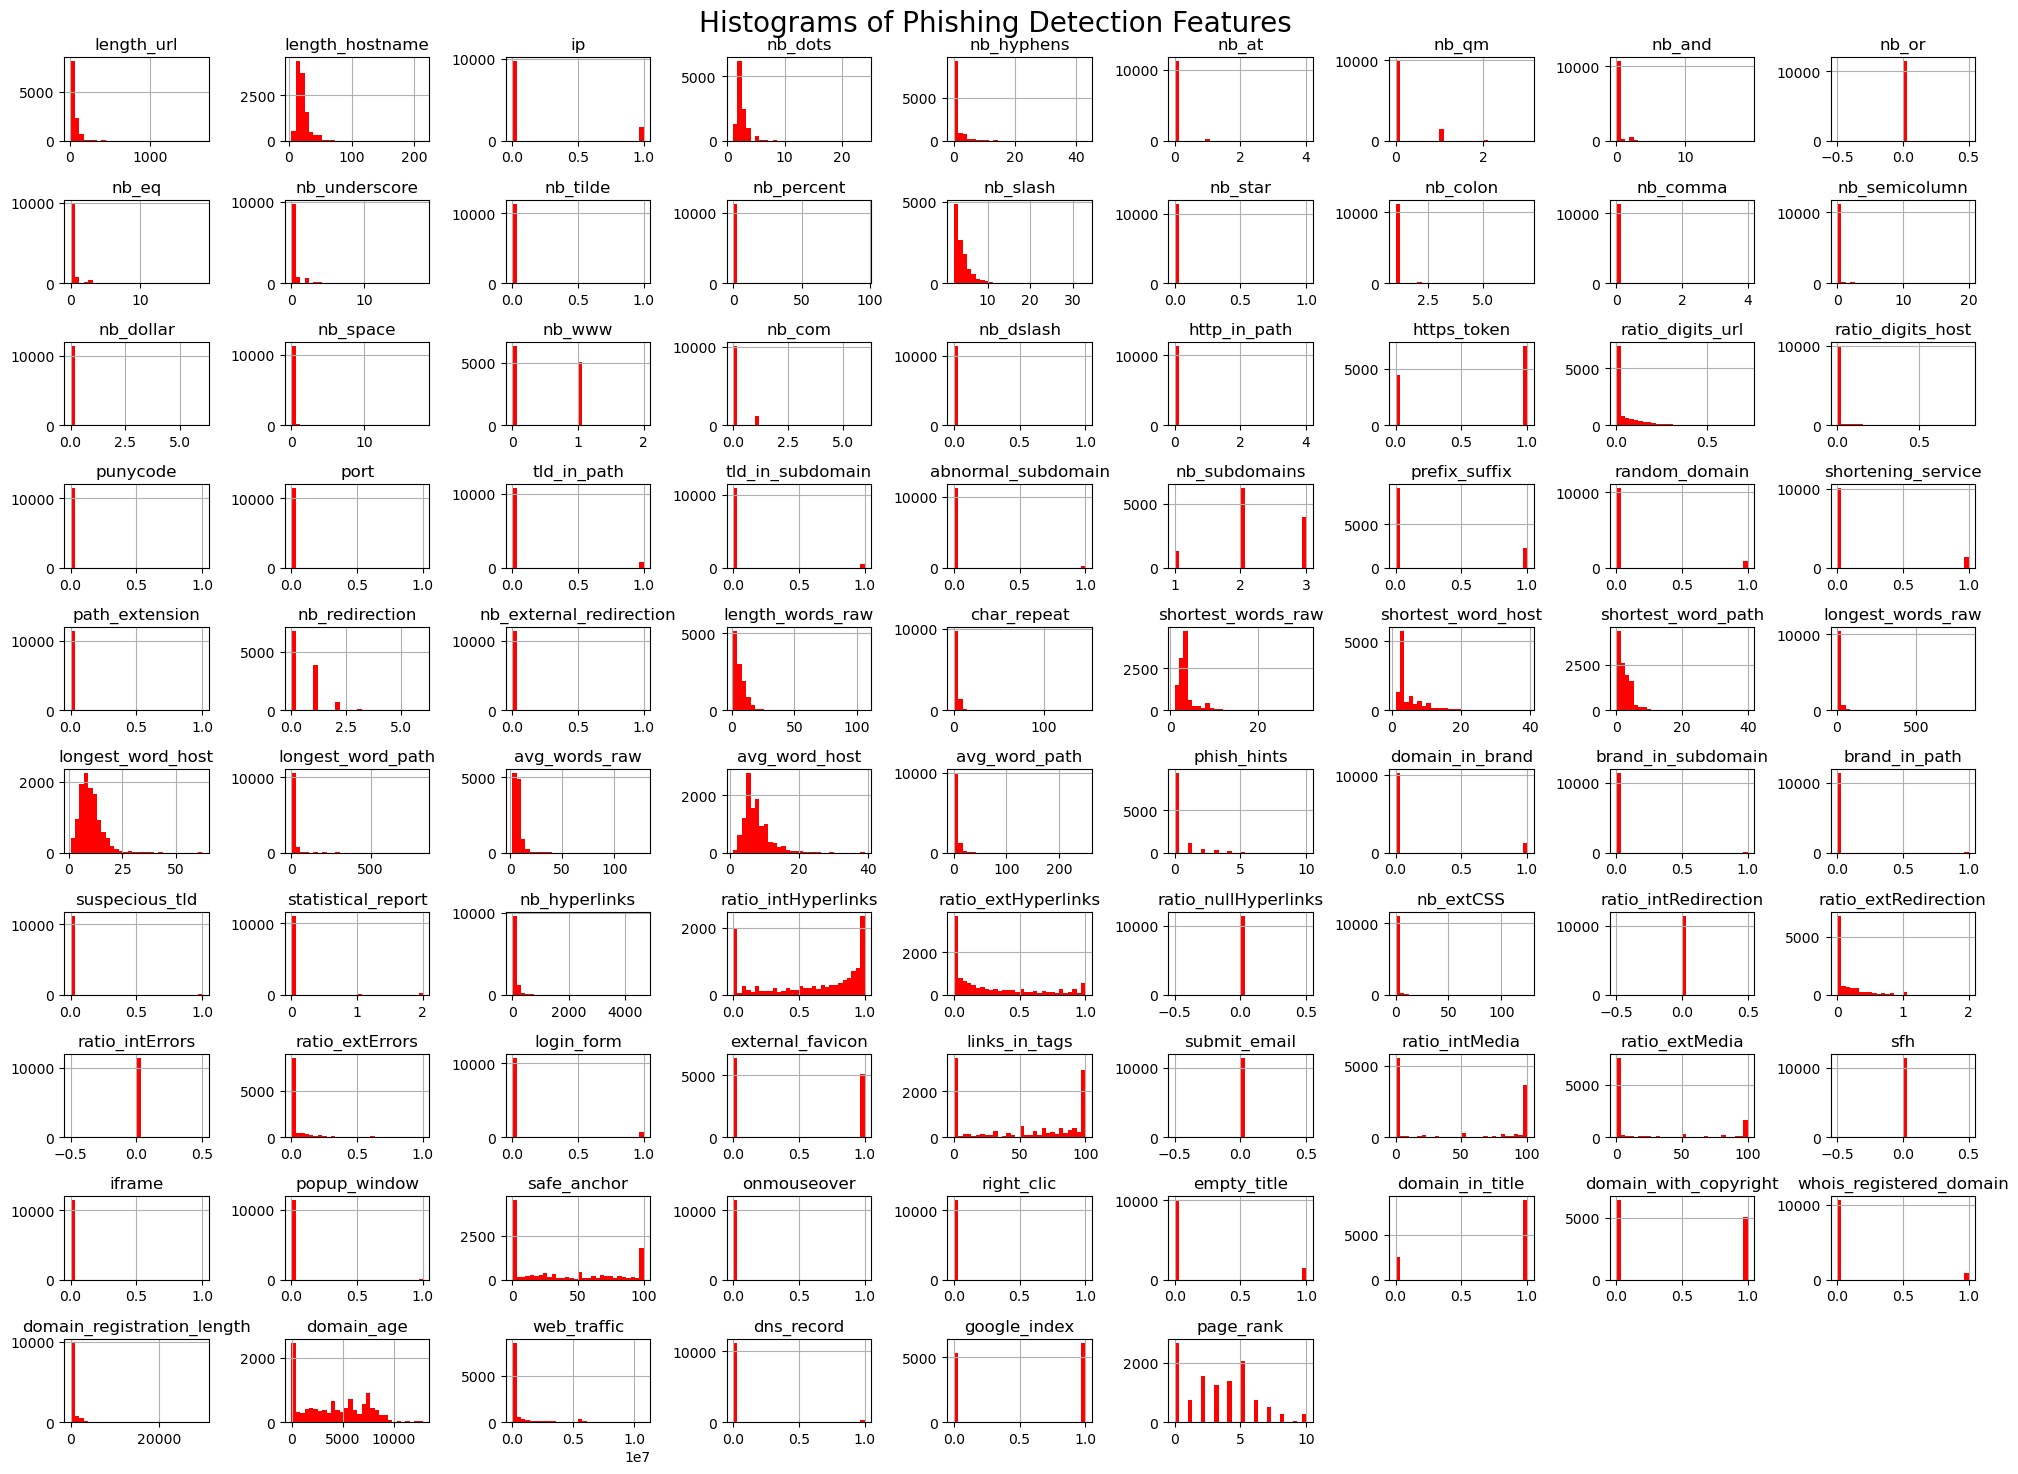

In [22]:
df.drop(columns=['url','status']).hist(bins=30, figsize=(20, 15),color='r')
plt.suptitle("Histograms of Phishing Detection Features", fontsize=20)
plt.tight_layout()
plt.show()


#### BOX PLOT

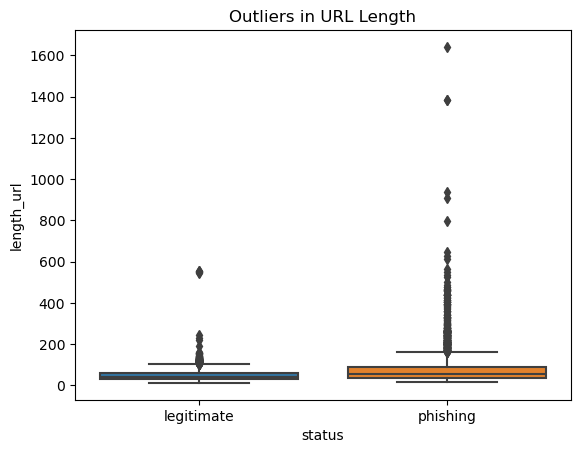

In [41]:
sns.boxplot(data=df, x='status', y='length_url')
plt.title("Outliers in URL Length")
plt.show()
